$$\newcommand{\norm}[2]{\left\|#1\right\|_{#2}}$$
$$\newcommand{\abs}[1]{\left|#1\right|}$$
$$\newcommand{\vecv}[1]{\mathbf{#1}}$$
$$\newcommand{\magnetic}{\gamma_{N}}$$
$$\newcommand{\tangential}{\gamma_{t}}$$
$$\newcommand{\normal}{\gamma_{n}}$$
$$\newcommand{\delt}{\delta_{\gamma}}$$
$$\newcommand{\jmp}[1]{[#1]_{\Gamma}}$$
$$\newcommand{\avg}[1]{\{#1\}_{\Gamma}}$$
$$\newcommand{\unit}[1]{\vecv{e}_{#1}}$$
$$\newcommand{\sg}[2]{{#1}^{#2}}$$
$$\newcommand{\greens}[1]{E_{\kappa}(\vecv{#1})}$$
$$\newcommand{\ip}[1]{{\color{magenta}#1}}$$
$$\newcommand{\Pot}{\Psi_{V}^{\kappa}}$$
$$\newcommand{\VecPot}{\pmb{\Pot}}$$
$$\newcommand{\SL}{\Psi_{SL}^{\kappa}}$$
$$\newcommand{\DL}{\Psi_{DL}^{\kappa}}$$
$$\newcommand{\half}{\frac{1}{2}}$$
$$\newcommand\numberthis{\addtocounter{equation}{1}\tag{\theequation}}$$
$$\newcommand{\grad}{\textbf{grad }}$$
$$\newcommand{\ndiv}{\textbf{div }}$$
$$\newcommand{\curl}{\textbf{curl }}$$
$$\newcommand{\cgrad}[1]{\textbf{grad}_{ #1}}$$
$$\newcommand{\cdiv}[1]{\textbf{div}_{#1}}$$
$$\newcommand{\ccurl}[1]{\textbf{curl}_{#1}}$$
$$\newcommand{\csgrad}[1]{\textbf{Grad}_{ #1}}$$ 
$$\newcommand{\csdiv}[1]{\textbf{Div}_{#1}}$$
$$\newcommand{\sdiv}{\textbf{Div}_{\Gamma}}$$
$$\newcommand{\sgrad}{\textbf{Grad}_{\Gamma}}$$
$$\newcommand{\Sgrad}{\textbf{Grad}_{S}}$$
$$\newcommand{\hsgrad}{\textbf{Grad}_{\Gamma_{h}}}$$
$$\newcommand{\scurl}{\text{curl}_{\Gamma}}$$
$$\newcommand{\hscurl}{\text{curl}_{\Gamma_{h}}}$$
$$\newcommand{\vscurl}{\textbf{curl}_{\Gamma}}$$
$$\newcommand{\cnabla}[1]{\nabla_{#1}}$$
$$\newcommand{\vx}{\textbf{x}}$$
$$\newcommand{\SLO}{\vecv{S}_{\kappa}}$$
$$\newcommand{\DLO}{\vecv{C}_{\kappa}}$$

# OSRC Preconditioning implementation

# Wave Scattering on a sphere by Vectorial Spherical Harmonics approximations


We have that the following elements give an orthonormal basis:

\begin{align*}
U_{n}^{m}(\hat{r})&:=\frac{1}{\sqrt{n(n+1)}}\Sgrad Y_{n}^{m}(\hat{r})\\
V_{n}^{m}(\hat{r})&:=\hat{r}\times U_{n}^{m}(\hat{r})
\end{align*}

where:

\begin{equation}
Y_{n}^{m}(\theta, \varphi):= \sqrt{\frac{(2n+1)(n-|m|)!}{4\pi(n+|m|)!}}P^{|m|}_{n}(\cos(\theta))e^{im\varphi}
\end{equation}

We can use corollary 2.47 from \cite{kirsch}.

Corollary:

Every vector field $A \in L^{2}(S^{2}, \mathbb{C}^{3})$ has an expansion of the form:

\begin{equation}
A(\hat{r}) = \sum_{n=0}^{\infty}\sum_{|m|\leq n}[a_{n}^{m}Y^{m}_{n}(\hat{r})\hat{r}+ b_{n}^{m}U_{n}^{m}(\hat{r})+c_{n}^{m}V_{n}^{m}(\hat{r})]
\end{equation}

where:

\begin{align*}
a_{n}^{m} &= \int_{S^2} A(\hat{r})  \cdot \hat{r} Y_{n}^{-m}(\hat{r}) ds(\hat{r}), \;\;|m|\leq n, n \geq 0,\\
b_{n}^{m} &= \int_{S^2} A(\hat{r})  \cdot U_{n}^{-m}(\hat{r}) ds(\hat{r}), \;\;|m|\leq n, n \geq 1, b_{0}^{0}=0,\\
c_{n}^{m} &= \int_{S^2} A(\hat{r})  \cdot V_{n}^{-m}(\hat{r}) ds(\hat{r}), \;\;|m|\leq n, n \geq 1, c_{0}^{0}=0,\\
\end{align*}



For the incident electric field, $\vecv{E}^{inc}(\vecv{x}) = (1, 0, 0) e^{-i \kappa x_{3}} = (1, 0, 0) e^{-i \kappa r\cos(\theta)} $ we can perform the expansion into spherical harmonics by using theorem 2.32 from \cite{kirsch}:

\begin{theorem}
For $\hat{x}, \hat{y} \in S^{2}$ and $r>0$ there holds the Jacobi-Anger decomposition:

\begin{align*}
e^{i\kappa r \hat{x}\cdot \hat{y}} &= 4\pi \sum_{n=0}^{\infty}\sum_{m=-n}^{n} i^{n} j_{n}(\kappa r) Y_{n}^{m}(\hat{x}) Y_{n}^{-m}(\hat{y})\\
&= \sum_{n=0}^{\infty} i^{n}(2n+1) j_{n}(\kappa r) P_{n}(\hat{x} \cdot \hat{y})
\end{align*}
\end{theorem}

We have that $r\hat{x} \cdot \hat{y} = x_{3} = r\cos(\theta)$, with$r=1$. Then:

\begin{align*}
e^{-i\kappa r x_{3}} &= 4\pi \sum_{n=0}^{\infty}\sum_{m=-n}^{n} i^{n} j_{n}(\kappa r) Y_{n}^{m}(\hat{x}) Y_{n}^{-m}(\hat{y})\\
&= \sum_{n=0}^{\infty} (-i)^{n}(2n+1) j_{n}(\kappa r) P_{n}(\cos(\theta))
\end{align*}

From this we can find a decomposition for $\vecv{E}^{inc}$:

\begin{equation}
\vecv{E}^{inc}(r, \theta, \varphi) =  \displaystyle\sum_{i=1}^{\infty}(-i)^{n}\frac{2n+1}{n(n+1)}\left(\vecv{M}_{o,1,n}(\kappa, \vecv{r})+i\vecv{N}_{e,1,n}(\kappa, \vecv{r})\right)
\end{equation}

where $\vecv{M}_{o,1,n}(\kappa, \vecv{r})$ and ${N}_{e,1,n}(\kappa, \vecv{r})$ are the so called magnetic and electric harmonics, given by:

\begin{align*}
\vecv{M}_{o,1,n}(\kappa, \vecv{r}) = \curl(\vecv{r} \psi_{o,1,n}(r, \theta, \varphi) )\\
\vecv{N}_{e,1,n}(\kappa, \vecv{r}) = \frac{\curl(\curl(\vecv{r} \psi_{e,1,n}(r, \theta, \varphi) ))}{\kappa}
\end{align*}

where:

\begin{align*}
\psi_{o,1,n}(r, \theta, \varphi)& = \sin(\varphi) P_{n}^{1}(\cos(\theta))j_{n}(\kappa r)\\
\psi_{e,1,n}(r, \theta, \varphi) &= \cos(\varphi) P_{n}^{1}(\cos(\theta))j_{n}(\kappa r)
\end{align*}

where $P_{n}^{1}(\cos(\theta))$ is the first order Legendre polynomial of degree n and $j_{n}(\kappa r)$ are spherical Bessel functions. 


Notice that:

\begin{align*}
\psi_{o,1,n}(r, \theta, \varphi)& =j_{n}(\kappa r) \frac{i( Y_{n}^{-1}(\theta, \varphi)-Y_{n}^{1}(\theta, \varphi))}{2\sqrt{\frac{(2n+1)(n-1)!}{4\pi(n+1)!}}}
\psi_{e,1,n}(r, \theta, \varphi) &=j_{n}(\kappa r) \frac{( Y_{n}^{-1}(\theta, \varphi)+Y_{n}^{1}(\theta, \varphi))}{2\sqrt{\frac{(2n+1)(n-1)!}{4\pi(n+1)!}}}
\end{align*}

See that  $ 2\sqrt{\frac{(2n+1)(n-1)!}{4\pi(n+1)!}} = 2\sqrt{\frac{(2n+1)(n-1)!}{4\pi(n+1) n(n-1)!}} = 2\sqrt{\frac{(2n+1)}{4\pi(n+1) n}} $.


Let's call $K = \left(2\sqrt{\frac{(2n+1)}{4\pi n(n+1)}} \right)^{-1} $. Then:

\begin{align*}
\psi_{o,1,n}(r, \theta, \varphi)& =iK j_{n}(\kappa r)\sqrt{n(n+1)} \frac{( Y_{n}^{-1}(\theta, \varphi)-Y_{n}^{1}(\theta, \varphi))}{\sqrt{n(n+1)}}\\
\psi_{e,1,n}(r, \theta, \varphi) &=Kj_{n}(\kappa r)\sqrt{n(n+1)} \frac{( Y_{n}^{-1}(\theta, \varphi)+Y_{n}^{1}(\theta, \varphi))}{\sqrt{n(n+1)}}
\end{align*}

We also know that the vectorial spherical harmonics have the following properties

\begin{align*}
\curl(f(r)\frac{\vecv{Y}_{n}^{m}}{\sqrt{n(n+1)}}) &= - f(r)V_{n}^{m} \\
\curl(f(r)U_{n}^{m} )&= \left(\frac{df(r)}{dr}+\frac{f(r)}{r}\right)V_{n}^{m}\\
\curl(f(r)V_{n}^{m} ) &= -\frac{n(n+1)}{r^{2}}f(r)\frac{\vecv{Y}_{n}^{m}}{\sqrt{n(n+1)}}-\left(\frac{df(r)}{dr}+\frac{f(r)}{r}\right)U_{n}^{m}
\end{align*}

where $\vecv{Y}_{n}^{m} = \vecv{r} Y_{n}^{m}$


Hence:

\begin{align*}
\vecv{M}_{o,1,n}(\kappa, \vecv{r}) &= \curl(\vecv{r} \psi_{o,1,n}(r, \theta, \varphi) )\\
&= \curl\left[j_{n}(\kappa r)\vecv{r}\left( iK j_{n}(\kappa r) \sqrt{n(n+1)}\frac{( Y_{n}^{-1}(\theta, \varphi)-Y_{n}^{1}(\theta, \varphi))}{\sqrt{n(n+1)}}\right)\right]\\
&= \curl\left[iK j_{n}(\kappa r)\sqrt{n(n+1)} \frac{( \vecv{Y}_{n}^{-1}(\theta, \varphi)-\vecv{Y}_{n}^{1}(\theta, \varphi))}{\sqrt{n(n+1)}}\right]\\
&= iK \sqrt{n(n+1)}\frac{( \curl(j_{n}(\kappa r) \vecv{Y}_{n}^{-1}(\theta, \varphi))-\curl(j_{n}(\kappa r) \vecv{Y}_{n}^{1}(\theta, \varphi)))}{\sqrt{n(n+1)}}
\end{align*}


so using the curl properties of the vectorial spherical harmonics:

\begin{align*}
\vecv{M}_{o,1,n}(\kappa, \vecv{r}) &= -iK j_{n}(\kappa r) \sqrt{n(n+1)}\left(V_{n}^{-1}(\theta, \varphi)-V_{n}^{1}(\theta, \varphi) \right)\\
 &= (-i)^{2}K j_{n}(\kappa r)\hat{r} \times \Sgrad 2\sin(\varphi)P_{n}^{1}(\cos(\theta))
\end{align*}

To calculate the tangential trace of $\vecv{M}_{o,1,n}(\kappa, \vecv{r})$, consider the following:

\begin{align*}
(\vecv{\hat{r}}\times\grad A)_{T} &= \vecv{\hat{r}}\times((\vecv{\hat{r}}\times\grad A) \times \vecv{\hat{r}}) \\
&= \vecv{\hat{r}}\times\grad A \norm{\vecv{\hat{r}}}{2}^{2} - \vecv{\hat{r}}(\vecv{r}\cdot(\vecv{\hat{r}}\times\grad A) )\\
&= \vecv{\hat{r}}\times\grad A - \vecv{\hat{r}}(\grad A\cdot(\vecv{\hat{r}}\times\vecv{\hat{r}}))\\
&= \vecv{\hat{r}}\times\grad A 
\end{align*}

Applied to $\vecv{M}_{o,1,n}(\kappa, \vecv{r})$:

\begin{align*}
\vecv{M}_{o,1,n}(\kappa, \vecv{r})_{T} &= (-i)^{2} j_{n}(\kappa r)\hat{r} \times \Sgrad \sin(\varphi)P_{n}^{1}(\cos(\theta))\\
&=-j_{n}(\kappa r)\hat{r} \times \Sgrad \sin(\varphi)P_{n}^{1}(\cos(\theta))
\end{align*}

For $\vecv{N}_{e,1,n}$ we have


\begin{equation*}
\vecv{N}_{e,1,n}(\kappa, \vecv{r}) = -\frac{1}{\kappa} \curl K\left( -j_{n}(\kappa r) \sqrt{n(n+1)}\left[V_{n}^{-1}(\theta, \varphi)+V_{n}^{1}(\theta, \varphi)\right]\right)\\
\end{equation*}

Using the curl properties again:

\begin{align*}
\curl \left( j_{n}(\kappa r)\sqrt{n(n+1)} \left[V_{n}^{-1}(\theta, \varphi)+V_{n}^{1}(\theta, \varphi)\right]\right)&=\\
 -\frac{n(n+1)}{r^{2}}\frac{j_{n}(\kappa r)}{\sqrt{(n+1)n}}(\vecv{Y}_{n}^{-1}(\theta, \phi)+\vecv{Y}_{n}^{1}(\theta, \phi))&-\left(j_{n}(\kappa r)'\kappa+\frac{j_{n}(\kappa r)}{r}\right)(U_{n}^{-1}(\theta, \phi)+U_{n}^{1}(\theta, \phi))\sqrt{n(n+1)}
\end{align*}

Now, to take the tangential trace, notice:

\begin{align*}
(\vecv{r} A)_{T} &= \vecv{r}\times((\vecv{r} A) \times \vecv{r}) =0
\end{align*}

\begin{align*}
(\grad A)_{T} &= \vecv{r}\times(\grad A \times \vecv{r}) \\
&= \grad A \norm{r}{2}^{2} - \vecv{r}(\vecv{r}\cdot\grad A )\\
\end{align*}

Then:

\begin{align*}
\vecv{N}_{e,1,n}(\kappa, \vecv{r})_{T} &=\frac{K}{\kappa}\sqrt{n(n+1)}\left(j_{n}(\kappa r)'\kappa+\frac{j_{n}(\kappa r)}{r}\right)(U_{n}^{-1}(\theta, \phi)+U_{n}^{1}(\theta, \phi))\\
&= \left(j_{n}(\kappa r)'+\frac{j_{n}(\kappa r)}{\kappa r}\right) \Sgrad(\cos(\varphi)P_{n}^{1}(\cos(\theta)))
\end{align*}

Then the tangential incident field is given by:

\begin{align*}
&\vecv{E}^{inc}(r, \theta, \varphi)_{T} =  \displaystyle\sum_{i=1}^{\infty}(-i)^{n}\frac{2n+1}{n(n+1)}\left(\vecv{M}_{o,1,n}(\kappa, \vecv{r})_{T}+i\vecv{N}_{e,1,n}(\kappa, \vecv{r})_{T}\right)\\
&= \displaystyle\sum_{i=1}^{\infty}(-i)^{n}\frac{2n+1}{n(n+1)}\left(-j_{n}(\kappa r)\hat{r} \times \Sgrad \sin(\varphi)P_{n}^{1}(\cos(\theta)) +i \left(j_{n}(\kappa r)'+\frac{j_{n}(\kappa r)}{\kappa r}\right) \Sgrad(\cos(\varphi)P_{n}^{1}(\cos(\theta)))\right)
\end{align*}


Now we want to calculate $\vecv{M}$. For this we use the following theorem:
(Theorem 2.51 in \cite{kirsch}):

\begin{theorem}

Let $\kappa \in \mathbb{C}\setminus \{0\}$ with Im $\kappa$ and let $R>0$. For given $f_{R} \in L^{2}_{t}(S^{2})$ there exist unique solutions,  $E, H \in C^{2}(\mathbb{R}^{3}\setminus B[0, R])$ of

\begin{equation}
\curl \vecv{E} - i\omega \mu \vecv{H} = 0
\end{equation}

and

\begin{equation}
\curl \vecv{H} + i\omega \varepsilon \vecv{E} = 0
\end{equation}

in $\mathbb{R}^{3}\setminus B[0, R]$

with 
\begin{equation}
\lim_{r\rightarrow R} \norm{\nu \times \vecv{E}(r, \cdot)- f_{R}}{L^{2}(S^{2})} = 0
\end{equation}

such that $x\mapsto x\cdot \vecv{E}(x)$ and $x\mapsto x\cdot \vecv{H}(x)$ satisfy the Sommerfeld radiation condition. The solution is given by:

\begin{equation}
\begin{split}
\vecv{E}(r) = \sum_{n=1}^{\infty}\sum_{m=-n}^{n} \frac{(f_{R}, U_{n}^{m})_{L^{2}(S^{2})}}{\sqrt{n(n+1)}}\frac{1}{h_{n}^{(1)}(\kappa R)}\curl[x h_{n}^{(1)}(\kappa r) Y_{n}^{m}(\hat{r})]\\
 + \frac{(f_{R}, V_{n}^{m})_{L^{2}(S^{2})}}{\sqrt{n(n+1)}} \frac{R}{h_{n}^{(1)}(\kappa R) + \kappa R (h_{n}^{(1)}(\kappa
 R))^{\prime} }\curl \curl [x h_{n}^{(1)}(\kappa R) Y_{n}^{m}(\hat{r})]
 \end{split}
\end{equation}

\begin{equation}
\begin{split}
\vecv{H}(r) = \frac{1}{i\omega\mu}\sum_{n=1}^{\infty}\sum_{m=-n}^{n} \frac{(f_{R}, U_{n}^{m})_{L^{2}(S^{2})}}{\sqrt{n(n+1)}}\frac{1}{h_{n}^{(1)}(\kappa R)}\curl\curl[x h_{n}^{(1)}(\kappa r) Y_{n}^{m}(\hat{r})]\\
 + \kappa^{2}\frac{(f_{R}, V_{n}^{m})_{L^{2}(S^{2})}}{\sqrt{n(n+1)}} \frac{R}{h_{n}^{(1)}(\kappa R) + \kappa R (h_{n}^{(1)}(\kappa
 R))^{\prime} }\curl [x h_{n}^{(1)}(\kappa R) Y_{n}^{m}(\hat{r})]
 \end{split}
\end{equation}

\end{theorem}

As we already know, $\vecv{M} = \nu \times \vecv{H}$, but first, we calculate the coefficients $(f_{R}, U_{n}^{m})_{L^{2}(S^{2})}$ and  $(f_{R}, V_{n}^{m})_{L^{2}(S^{2})}$ by using the initial condition: $f_{R} = \hat{r} \times \vecv{E}^{inc}$.

\begin{align*}
&\hat{r}\times\vecv{E}^{inc}( \theta, \varphi) =\\
&\displaystyle\sum_{i=1}^{\infty}(-i)^{n}\frac{2n+1}{n(n+1)}\left(-j_{n}(\kappa R) \Sgrad \sin(\varphi)P_{n}^{1}(\cos(\theta)) +i \left(j_{n}(\kappa R)'+\frac{j_{n}(\kappa R)}{\kappa R}\right) \hat{r} \times\Sgrad(\cos(\varphi)P_{n}^{1}(\cos(\theta)))\right)\\
&= \displaystyle\sum_{i=1}^{\infty}(-i)^{n}\frac{2n+1}{n(n+1)}\left(\hat{r}\times\vecv{M}_{o,1,n}(\kappa, \vecv{r})+i\hat{r}\times\vecv{N}_{e,1,n}(\kappa, \vecv{r})\right)
\end{align*}

at the surface of the sphere. We can show that this is effective by performing some calculations:

In [10]:
import bempp.api
import numpy as np
from numba import jit
import scipy as sp
from bempp.api.linalg import lu
from matplotlib import pyplot as plt
import cmath
from itertools import chain
from itertools import chain
from bempp.api.linalg import lu
from scipy.linalg import solve, lu_solve
from scipy.linalg import lu_factor
from scipy.linalg import lu as slu
from bempp.api import GridFunction, as_matrix

In [11]:
m = 100
kappa = np.pi
kappa_eps = kappa + 1.0j*0.39*kappa**(1.0/3)*np.sqrt(2)**(2.0/3)
R = 1.0
direction = np.array([0, 0, -1], dtype='float64')
polarization = np.array([1, 0, 0], dtype='float64')

In [12]:
def transformToCartesian(vF, rho, theta, phi):
	T = np.array([[np.sin(theta)*np.cos(phi), np.cos(theta)*np.cos(phi), -np.sin(phi)],[np.sin(theta)*np.sin(phi), np.cos(theta)*np.sin(phi), np.cos(phi)],[np.cos(theta), -np.sin(theta), 0]])
	return np.dot(T, vF)


def transformToSpherical(vF, rho, theta, phi):
	T = np.array([[np.sin(theta)*np.cos(phi), np.cos(theta)*np.cos(phi), -np.sin(phi)],[np.sin(theta)*np.sin(phi), np.cos(theta)*np.sin(phi), np.cos(phi)],[np.cos(theta), -np.sin(theta), 0]])
	return np.dot(T.T, vF)


def getIncidentFieldVectors(theta, phi, Leg, DLeg, kappa, rho, n):
	bessel = [sp.special.spherical_jn(n, kappa*rho), sp.special.spherical_jn(n, kappa*rho, derivative = True)]
	coef0 = (-1j)**(n)*(2.0*n+1.0)/(n*(n+1.0))
	M = np.array([0, (np.cos(phi)/np.sin(theta))*Leg*bessel[0], np.sin(phi)*DLeg*bessel[0]*np.sin(theta)])
	N = np.array([(bessel[0]/(rho*kappa))*np.cos(phi)*n*(n+1)*Leg, -np.cos(phi)*DLeg*np.sin(theta)*((bessel[0]/(kappa*rho))+bessel[1]), -(np.sin(phi)/np.sin(theta))*Leg*((bessel[0]/(kappa*rho))+bessel[1])])
	return coef0*(M+1j*N)

@bempp.api.complex_callable(jit = False)
def traceIncidentCurrent(x, n, domain_index, result):
	rho = np.linalg.norm(x)
	phi = np.arccos(x[0]/np.sqrt(x[0]**2+x[1]**2))
	if(x[1]<0):
		phi = -phi
	theta = np.arccos(x[2]/rho)
	legendreFunctions = sp.special.lpmn(1, m, np.cos(theta))
	elements = [getIncidentFieldVectors(theta, phi, legendreFunctions[0][1][i], legendreFunctions[1][1][i], kappa, rho, i) for i in range(1,m)]
	s=0
	for i in range(m-1):
		s+=elements[i]
	result[:] = np.cross(n,np.cross(transformToCartesian(s, 1, theta, phi),n, axis=0), axis=0)

In [13]:
grid = bempp.api.shapes.sphere(h=0.4)
snc_space = bempp.api.function_space(grid, "SNC", 0)
rwg_space = bempp.api.function_space(grid, "RWG", 0)
p1_space = bempp.api.function_space(grid, "P", 1) 

In [14]:
@bempp.api.complex_callable
def fun(x, normal, domain_index, result):
    result[:] = np.exp(1j * x)
    
grid_fun = bempp.api.GridFunction(rwg_space, fun=fun)

In [15]:
@jit
def incident_field(x):
	return polarization * np.exp(1j * kappa * np.dot(x, direction))

@bempp.api.complex_callable
def double_tangential_trace(x, n, domain_index, result):
    result[:] = np.cross(n,np.cross(incident_field(x),n))

@bempp.api.complex_callable 
def tangential_trace(x, n, domain_index, result):
    result[:] = np.cross(incident_field(x),n)

trace_electric_incident = bempp.api.GridFunction(rwg_space, fun=double_tangential_trace)
trace_electric_incident_analytic = bempp.api.GridFunction(rwg_space, fun=traceIncidentCurrent) 

In [16]:
trace_electric_incident_diff = trace_electric_incident+trace_electric_incident_analytic #I used '+' instead of '-', because the signs are flipped
np.linalg.norm(trace_electric_incident_diff.coefficients)/np.linalg.norm(trace_electric_incident.coefficients)

3.9990412384608414e-16

Now, to calculate the magnetic current, we recall that:

\begin{align*}
\vecv{M}_{o,1,n}(\kappa, \vecv{r}) &= -iK j_{n}(\kappa r) \left(V_{n}^{-1}(\theta, \varphi)-V_{n}^{1}(\theta, \varphi) \right)\sqrt{n(n+1)}\\
\vecv{N}_{e,1,n}(\kappa, \vecv{r})_{T} &=\frac{K}{\kappa}\left(j_{n}(\kappa r)'\kappa+\frac{j_{n}(\kappa r)}{r}\right)(U_{n}^{-1}(\theta, \phi)+U_{n}^{1}(\theta, \phi))\sqrt{n(n+1)}
\end{align*}

we can rewrite the initial condition as:

\begin{align*}
&\hat{r}\times\vecv{E}^{inc}( \theta, \varphi) = \displaystyle\sum_{i=1}^{\infty}(-i)^{n}\frac{2n+1}{\sqrt{n(n+1)}}\\
&\left(-iK j_{n}(\kappa R)\hat{r}\times  \left(V_{n}^{-1}(\theta, \varphi)-V_{n}^{1}(\theta, \varphi) \right)+i\frac{K}{\kappa}\left(j_{n}(\kappa R)'\kappa+\frac{j_{n}(\kappa R)}{R}\right)\hat{r}\times(U_{n}^{-1}(\theta, \phi)+U_{n}^{1}(\theta, \phi))\right)\\
&= \displaystyle\sum_{i=1}^{\infty}(-i)^{n}\frac{2n+1}{\sqrt{n(n+1)}}\left(-iK j_{n}(\kappa R)  \left(U_{n}^{1}(\theta, \varphi)-U_{n}^{-1}(\theta, \varphi) \right)+i\frac{K}{\kappa}\left(j_{n}(\kappa R)'\kappa+\frac{j_{n}(\kappa R)}{R}\right)(V_{n}^{-1}(\theta, \phi)+V_{n}^{1}(\theta, \phi))\right)
\end{align*}

Then we can calculate the coefficients:

\begin{align*}
&(f_{R}, U_{n}^{m})_{L^{2}(S^{2})} =\displaystyle\sum_{i=1}^{\infty}(-i)^{n}\frac{2n+1}{\sqrt{n(n+1)}} \\
&\left( \left(-iK j_{n}(\kappa R)  \left(U_{n}^{1}(\theta, \varphi)-U_{n}^{-1}(\theta, \varphi) \right)+i\frac{K}{\kappa}\left(j_{n}(\kappa R)'\kappa+\frac{j_{n}(\kappa R)}{R}\right)(V_{n}^{-1}(\theta, \phi)+V_{n}^{1}(\theta, \phi))\right), U_{n*}^{m}\right)_{L^{2}(S^{2})}\\
&= (-i)^{n+1}\frac{2n+1}{\sqrt{n(n+1)}}Kj_{n}(\kappa R)\; \; \forall n, |m|=1\\
&= (-i)^{n+1}\frac{2n+1}{\sqrt{n(n+1)}}\left(2\sqrt{\frac{(2n+1)}{4\pi n(n+1)}} \right)^{-1}j_{n}(\kappa R) \; \; \forall n, |m|=1\\
&= (-i)^{n+1}\sqrt{\frac{2n+1}{\pi}}j_{n}(\kappa R)\; \; \forall n, m=1\\
&= (-i)^{n+1}\sqrt{\frac{2n+1}{\pi}}j_{n}(\kappa R)\; \; \forall n, m=-1
\end{align*}

\begin{align*}
&(f_{R}, V_{n}^{m})_{L^{2}(S^{2})} =\displaystyle\sum_{i=1}^{\infty}(-i)^{n}\frac{2n+1}{\sqrt{n(n+1)}} \\
&\left( \left(-iK j_{n}(\kappa R)  \left(U_{n}^{1}(\theta, \varphi)-U_{n}^{-1}(\theta, \varphi) \right)+i\frac{K}{\kappa}\left(j_{n}(\kappa R)'\kappa+\frac{j_{n}(\kappa R)}{R}\right)(V_{n}^{-1}(\theta, \phi)+V_{n}^{1}(\theta, \phi))\right), V_{n*}^{m}\right)_{L^{2}(S^{2})}\\
&= i\frac{K}{\kappa}(-i)^{n}\frac{2n+1}{\sqrt{n(n+1)}} \left(j_{n}(\kappa R)'\kappa+\frac{j_{n}(\kappa R)}{R}\right)\\
&=(-i)^{n-1}\frac{2n+1}{\sqrt{n(n+1)}}K\left(j_{n}(\kappa R)'\kappa+\frac{j_{n}(\kappa R)}{R}\right)\; \; \forall n, |m|=1\\
&=(-i)^{n-1}\frac{2n+1}{\sqrt{n(n+1)}}\left(2\sqrt{\frac{(2n+1)}{4\pi n(n+1)}} \right)^{-1}\left(j_{n}(\kappa R)'\kappa+\frac{j_{n}(\kappa R)}{R}\right)\; \; \forall n, |m|=1\\
&= (-i)^{n-1}\sqrt{\frac{2n+1}{\pi}}\left(j_{n}(\kappa R)'\kappa+\frac{j_{n}(\kappa R)}{R}\right)\; \; \forall n, |m|=1
\end{align*}

Finally:

\begin{equation}
\begin{split}
\vecv{H}(r) = \frac{1}{i\omega\mu}\sum_{n=1}^{\infty}(-i)^{n+1}\sqrt{\frac{2n+1}{\pi n(n+1)}}j_{n}(\kappa R)\frac{1}{h_{n}^{(1)}(\kappa R)}\curl\curl[x h_{n}^{(1)}(\kappa r) (Y_{n}^{1}(\hat{r})-Y_{n}^{-1}(\hat{r}))]\\
 + \kappa^{2}(-i)^{n-1}\sqrt{\frac{2n+1}{\pi n(n+1)}}\left(j_{n}(\kappa R)'\kappa+\frac{j_{n}(\kappa R)}{R}\right)\frac{R}{h_{n}^{(1)}(\kappa R) + \kappa R (h_{n}^{(1)}(\kappa
 R))^{\prime} }\curl [x h_{n}^{(1)}(\kappa R)( Y_{n}^{1}(\hat{r})+Y_{n}^{-1}(\hat{r}))]
 \end{split}
\end{equation}

\begin{equation}
\begin{split}
\vecv{H}(r) = \frac{1}{i\omega\mu}\sum_{n=1}^{\infty}(-i)^{n}\frac{j_{n}(\kappa R)}{h_{n}^{(1)}(\kappa R)}\curl\curl[x h_{n}^{(1)}(\kappa r) P_{n}^{1}(\cos(\theta))\sin(\varphi)]\\
 + \kappa^{2}(-i)^{n-1}\frac{j_{n}(\kappa R)'\kappa R+j_{n}(\kappa R)}{h_{n}^{(1)}(\kappa R) + \kappa R (h_{n}^{(1)}(\kappa
 R))^{\prime} }\curl [x h_{n}^{(1)}(\kappa R)P_{n}^{1}(\cos(\theta))\cos(\varphi)]
 \end{split}
\end{equation}

To find the complete expression, see theorem 2.51 in \cite{kirsch}. We can also write code to check this expression.


In [17]:
def sphHankel(n,x):
    return sp.special.spherical_jn(n,x)+1j*sp.special.spherical_yn(n,x)

def hankelDerivative(n,x):
	return sp.special.spherical_jn(n,x, derivative = True)+1j*sp.special.spherical_yn(n,x, derivative = True)

def DRiccatiBessel(x, n):
	return x*sp.special.spherical_jn(n-1, x)-n*sp.special.spherical_jn(n, x)

def RiccatiBessel(x, n):
	return x*sp.special.spherical_jn(n, x)

def exactCoef1(m, x):
	return sphHankel(m,x)*x

def exactCoef2(m, x):
	return sphHankel(m,x) + hankelDerivative(m,x)*x

def getVectors(rho, theta, phi, Leg, DLeg):
	r = np.array([rho, 0, 0])/rho
	M = np.cross(r, np.array([0, -DLeg*np.sin(theta)*np.sin(phi), (np.cos(phi)/np.sin(theta))*Leg]))
	N = np.array([0, -DLeg*np.sin(theta)*np.cos(phi), -(np.sin(phi)/np.sin(theta))*Leg])
	return [M,N]

def exactCoefficients(Ric, DRic, kappa, rho, n):
    coef1 = (exactCoef2(n, kappa*rho)/exactCoef1(n,kappa*rho))*Ric
    coef2 = (exactCoef1(n, kappa*rho)/exactCoef2(n,kappa*rho))*DRic
    return [coef1, coef2]

def getExactFieldVectors(theta, phi, Leg, DLeg, Ric, DRic,kappa, rho, n):
	coef0 = (-1j)**(n+1)*(2.0*n+1.0)/(n*(n+1.0))
	[M1, N1] = getVectors(rho, theta, phi, Leg, DLeg)
	[coef1, coef2] = exactCoefficients(Ric, DRic, kappa, rho, n)
	M = M1*coef1
	N = N1*coef2
	return coef0*(1j*N+M)*(1.0/kappa)

@bempp.api.complex_callable(jit = False)
def exactCurrent(x, n, domain_index, result):
	rho = np.linalg.norm(x)
	phi = np.arccos(x[0]/np.sqrt(x[0]**2+x[1]**2))
	if(x[1]<0):
		phi = -phi
	theta = np.arccos(x[2]/rho)
	legendreFunctions = sp.special.lpmn(1, m, np.cos(theta))
	s=0
	for i in range(1, m):
		s+=getExactFieldVectors(theta, phi, legendreFunctions[0][1][i], legendreFunctions[1][1][i], RiccatiBessel(kappa*rho, i), DRiccatiBessel(kappa*rho, i), kappa, rho, i) 	
	result[:] = transformToCartesian(s, 1, theta, phi)

In [18]:
elec = bempp.api.operators.boundary.maxwell.electric_field(rwg_space, rwg_space, snc_space, kappa)
magnetic = bempp.api.operators.boundary.maxwell.magnetic_field(rwg_space, rwg_space, snc_space, kappa)
identity = bempp.api.operators.boundary.sparse.identity(rwg_space, rwg_space, snc_space)
electric_incident = bempp.api.GridFunction(rwg_space, fun=tangential_trace)

rhs = (identity*0.5+magnetic)*electric_incident
exactNumCurr = lu(elec, rhs)
exactCurr = bempp.api.GridFunction(rwg_space, fun=exactCurrent) 

In [19]:
number_of_angles = 400
angles = np.pi * np.linspace(0, 1, number_of_angles)
unit_points = np.array([np.sin(angles), np.zeros(number_of_angles), np.cos(angles)])

magnetic_far = bempp.api.operators.far_field.maxwell.magnetic_field(electric_incident.space, unit_points, kappa)* electric_incident
electric_far1 = bempp.api.operators.far_field.maxwell.electric_field(exactNumCurr.space, unit_points, kappa) * exactNumCurr
electric_far2 = bempp.api.operators.far_field.maxwell.electric_field(exactCurr.space, unit_points, kappa) * exactCurr

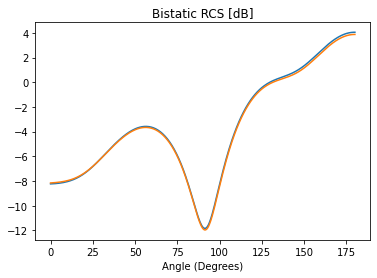

In [20]:
far_field = electric_far1-magnetic_far
bistatic_rcs= 10 * np.log10(np.sum(np.abs(far_field)**2, axis=0))
plt.plot(angles * 180 / np.pi, bistatic_rcs, label = 'Exact Numerical Far Field')
plt.title("Bistatic RCS [dB]")
_ = plt.xlabel('Angle (Degrees)')
far_field2 = electric_far2+magnetic_far
bistatic_rcs= 10 * np.log10(np.sum(np.abs(far_field2)**2, axis=0))
plt.plot(angles * 180 / np.pi, bistatic_rcs, label = 'Exact Analytic Far Field')
plt.title("Bistatic RCS [dB]")
_ = plt.xlabel('Angle (Degrees)')
plt.show()

Now we want to implement the OSRC Preconditioner. In order to do this, we first build the Magnetic to Electric operator.

# Analytic MtE Operator on a sphere

In [21]:

def Sum(A, B, inpt, inner_coeff, outer_coeff):
    s = 0.0
    index = 0
    for coefficient in A:
        s+= coefficient*inpt/(inner_coeff+B[index]*inpt)
        index+=1
    return outer_coeff+s

def Sum2(A, B, inpt,R_0):
	s = 0.0
	index = 0
	for coefficient in A:
		s+= coefficient/(B[index]*(1.0+B[index]*inpt))
		index+=1
	return R_0-s

def BranchCutPade(Np, x, angle):
	a = [2.0/(2.0*Np+1)*np.sin(np.pi*(i+1)/(2.0*Np+1))**2 for i in range(Np)]
	b = [np.cos(np.pi*(i+1)/(2.0*Np+1))**2 for i in range(Np)]
	A = [np.exp(-1.0j*angle/2)*a[i]/(1+b[i]*(np.exp(-1.0j*angle)-1))**2 for i in range(Np)]
	B = [np.exp(-1.0j*angle)*b[i]/(1+b[i]*(np.exp(-1.0j*angle)-1)) for i in range(Np)]
	C_0 = np.exp(1.0j*angle/2)*Sum(a,b,np.exp(-1.0j*angle)-1,1,1)
	R_0 = Sum(A,B,1,0,C_0)
	return Sum2(A, B, x, R_0)

def InversePade(Np, x, angle):
	a = [2.0/(2.0*Np+1)*np.sin(np.pi*(i+1)/(2.0*Np+1))**2 for i in range(Np)]
	b = [np.cos(np.pi*(i+1)/(2.0*Np+1))**2 for i in range(Np)]
	A = [np.exp(-1.0j*angle/2)*a[i]/(1+b[i]*(np.exp(-1.0j*angle)-1))**2 for i in range(Np)]
	B = [np.exp(-1.0j*angle)*b[i]/(1+b[i]*(np.exp(-1.0j*angle)-1)) for i in range(Np)]
	C_0 = np.exp(1.0j*angle/2)*Sum(a,b,np.exp(-1.0j*angle)-1,1,1)

	gamma = C_0*B[0]* B[1] + A[0]*B[1] + A[1]*B[0]
	r0 = B[0]* B[1]/gamma
	alpha = C_0/gamma
	beta = -(C_0*(B[0] + B[1]) + (A[0]+A[1]))/gamma
	delta = (B[0] + B[1])/gamma
	omega = (r0*C_0-1)/gamma

	q2 = (beta-np.sqrt(beta**2-4*alpha))/2
	q1= alpha/q2
	r2 = (omega-(delta+beta*r0)*q2)/(q1-q2)
	r1 = delta+beta*r0-r2
	Q = [q1, q2]
	R = [r1, r2]
	s = 0
	for i in range(Np):
		s+=(R[i]/(x-Q[i]))
	return r0+s, (x**2*r0+x*(r1+r2-(q1+q2)*r0)+r0*q1*q2-r1*q2-r2*q1)/(x**2-x*(q1+q2)+q1*q2)


def appCoefficients(Ric, DRic, kappa, rho, n):
	coef1 = (cmath.sqrt(1-(n*(n+1)/((kappa*rho)**2))))*Ric
	coef2 = (cmath.sqrt(1-(n*(n+1)/((kappa*rho)**2)))**(-1))*DRic
	return [coef1, coef2]

def appPadeCoefficients(Np,Ric, DRic, kappa, rho, n):
	angle = np.pi/2
	coeff = -(n*(n+1.0))/(kappa**2)
	s1 = BranchCutPade(Np, coeff, angle)
	s2 = InversePade(Np, coeff, angle)[0]
	coef1 = s1*Ric
	coef2 = s2*DRic
	return [coef1, coef2]

def getAppFieldVectors(theta, phi, Leg, DLeg, Ric, DRic,kappa, rho, n):
	kappa_eps = kappa + 1.0j*0.39*kappa**(1.0/3)*1.0**(-1.0/3)
	coef0 = (-1j)**(n+1)*(2.0*n+1.0)/(n*(n+1.0))
	[M1, N1] = getVectors(rho, theta, phi, Leg, DLeg)
	[coef1, coef2] = appCoefficients(Ric, DRic, kappa_eps, rho, n)
	M = M1*coef1
	N = N1*coef2
	return coef0*(N+1j*M)*(1.0/kappa)

def getPadeFieldVectors(theta, phi, Leg, DLeg, Ric, DRic,kappa, rho, n):
	kappa_eps = kappa + 1.0j*0.39*kappa**(1.0/3)*1.0**(-1.0/3)
	coef0 = (-1j)**(n+1)*(2.0*n+1.0)/(n*(n+1.0))
	Np = 2
	[M1, N1] = getVectors(rho, theta, phi, Leg, DLeg)
	[coef1, coef2] = appPadeCoefficients(Np, Ric, DRic, kappa_eps, rho, n)
	M = M1*coef1
	N = N1*coef2
	return coef0*(N+1j*M)*(1.0/kappa)

In [22]:
@bempp.api.complex_callable(jit = False)
def appCurrent(x, n, domain_index, result):
	kappa_eps = kappa + 1.0j*0.39*kappa**(1.0/3)*1.0**(-1.0/3)
	rho = np.linalg.norm(x)
	phi = np.arccos(x[0]/np.sqrt(x[0]**2+x[1]**2))
	if(x[1]<0):
		phi = -phi
	theta = np.arccos(x[2]/rho)
	legendreFunctions = sp.special.lpmn(1, m, np.cos(theta))
	s=0
	for i in range(1, m):
		s+=getAppFieldVectors(theta, phi, legendreFunctions[0][1][i], legendreFunctions[1][1][i], RiccatiBessel(kappa*rho, i), DRiccatiBessel(kappa*rho, i), kappa, rho, i) 	
	result[:] = transformToCartesian(s, 1, theta, phi)

@bempp.api.complex_callable(jit = False)
def padeCurrent(x, n, domain_index, result):
	kappa_eps = kappa + 1.0j*0.39*kappa**(1.0/3)*1.0**(-1.0/3)
	rho = np.linalg.norm(x)
	phi = np.arccos(x[0]/np.sqrt(x[0]**2+x[1]**2))
	if(x[1]<0):
		phi = -phi
	theta = np.arccos(x[2]/rho)
	legendreFunctions = sp.special.lpmn(1, m, np.cos(theta))
	s=0
	for i in range(1, m):
		s+=getPadeFieldVectors(theta, phi, legendreFunctions[0][1][i], legendreFunctions[1][1][i], RiccatiBessel(kappa*rho, i), DRiccatiBessel(kappa*rho, i), kappa, rho, i) 	
	result[:] = transformToCartesian(s, 1, theta, phi)
    

In [23]:
appCurr = bempp.api.GridFunction(rwg_space, fun=appCurrent) 
padeCurr = bempp.api.GridFunction(rwg_space, fun=padeCurrent) 
electric_far3 = bempp.api.operators.far_field.maxwell.electric_field(appCurr.space, unit_points, kappa) * appCurr
electric_far4 = bempp.api.operators.far_field.maxwell.electric_field(padeCurr.space, unit_points, kappa) * padeCurr

# Discrete Mte Operator

We have that the MtE is given by the following equation (the details for deriving this expression, see): 

\begin{equation}\label{eq:osrc}
\pmb{\Lambda}_{1,\varepsilon} \vecv{M} = \pmb{\Lambda}_{2,\varepsilon}(\nu \times \vecv{J}^{inc})\;\; \text{ on } \Gamma
\end{equation}

Where 
\begin{equation*}
\pmb{\Lambda}_{2,\varepsilon} = \vecv{I} - \vscurl \frac{1}{\kappa^{2}_{\varepsilon opt}}\scurl 
\end{equation*}

which is a local symmetrical operator that can be easily approximated. The difficulty of solving the first equation is related to find the inverse of $\pmb{\Lambda}_{1,\varepsilon}$ which is a non-local pseudodifferential operator given by:

\begin{equation*}
\pmb{\Lambda}_{1,\varepsilon} := (\vecv{I}+\mathcal{J})^{1/2}
\end{equation*}

where

\begin{equation*}
\mathcal{J} := \sgrad \frac{1}{\kappa^{2}}\sdiv - \vscurl \frac{1}{\kappa^{2}}\scurl
\end{equation*}

In this case, we should find the square root of $(\vecv{I}+\mathcal{J})^{1/2}$, which is not straightforward, but we can find a good approximation to this expression.  We can get a local approximation of this operator by performing rational approximations. In order to do so, we consider the rotating branch cut Padé Approximation:

\begin{equation}
(1+z)^{\half} \approx R_{0}-\sum_{j=1}^{N_{p}}\frac{A_{j}}{B_{j}(1+B_{j}z)}
\end{equation}

where $R_{N_{p}}$ is the standard real-valued Padé approximation of order $N_{p}$:

\begin{equation}
(1+z)^{\half}\approx R_{N_{p}}(z) = 1 + \sum_{j=1}^{N_{p}}\frac{a_{j}z}{1+b_{j}z}
\end{equation}

with $a_{j} = \frac{2}{2N_{p} +1}\sin^{2}\left(\frac{j\pi}{2 N_{p} +1} \right)$, $b_{j} = \cos^{2}\left(\frac{j\pi}{2 N_{p} +1} \right)$.

The angle of rotation $\theta_{p}$ is a free parameter and the constants are given by:

\begin{equation*}
C_{0} = e^{i\frac{\theta_{p}}{2}}R_{N_{p}}(e^{-i\theta_{p}}-1), \;\;  R_{0} = C_{0} + \sum_{j=1}^{N_{p}}\frac{A_{j}}{B_{j}}
\end{equation*}

\begin{equation*}
A_{j} = \frac{e^{-i\frac{\theta_{p}}{2}}a_{j}}{(1+b_{j}(e^{-i\theta_{p}}-1))^2}\;\; B_{j} = \frac{e^{-i\theta_{p}}b_{j}}{1+b_{j}(e^{-i\theta_{p}}-1)}
\end{equation*}

Then, considering that $z=\mathcal{J}$ and approximation of $\pmb{\Lambda}_{1,\varepsilon}$:

\begin{equation}
\pmb{\Lambda}_{1,\varepsilon} = (1+\mathcal{J})^{1/2} \approx \left(R_{0}-\sum_{j=1}^{N_{p}}\frac{A_{j}}{B_{j}} (\vecv{I}+B_{j}\mathcal{J})^{-1}\right)
\end{equation}

Then we have:

\begin{align*}
\pmb{\Lambda}_{1,\varepsilon}\vecv{M} = \pmb{\Lambda}_{2,\varepsilon}(\nu \times \vecv{J}^{\text{inc}}) \;\; \text{ on } \Gamma\\
\left(R_{0}-\sum_{j=1}^{N_{p}}\frac{A_{j}}{B_{j}} (\vecv{I}+B_{j}\mathcal{J})^{-1}\right) \vecv{M} = \left(\vecv{I}-\vscurl \frac{1}{\kappa^{2}}\scurl\right)(\nu \times \vecv{J}^{\text{inc}})\\
\left(R_{0}-\sum_{j=1}^{N_{p}}\frac{A_{j}}{B_{j}} (\vecv{I}+B_{j}\mathcal{J})^{-1}\right) \vecv{M} = \left(\vecv{I}-\vscurl \frac{1}{\kappa^{2}}\scurl\right)(\nu \times \vecv{J}^{\text{inc}})
\end{align*}

and defining: $\pmb{\phi}^{j} = (\vecv{I}+B_{j}\mathcal{J})^{-1}\vecv{M}$ and $\vecv{u} = -\left(\vecv{I}-\vscurl \frac{1}{\kappa^{2}}\scurl\right)(\nu \times \vecv{J}^{\text{inc}})$ we get the following system:

\begin{align*}
\begin{cases} 
\vecv{M}-\frac{1}{R_{0}}\sum_{j=1}^{N_{p}}\frac{A_{j}}{B_{j}} \pmb{\phi}^{j}=-\frac{\vecv{u}}{R_{0}}\\
\vecv{M} - \left(\vecv{I}+B_{j}\left( \sgrad \frac{1}{\kappa^{2}}\sdiv - \vscurl \frac{1}{\kappa^{2}}\scurl \right)\right)\pmb{\phi}^{j}  =0\\
\end{cases} 
\end{align*}

for the finite element approximation we consider a polyhedral approximation $\Gamma_{h}$ of $\Gamma$ for a triangulation $\mathcal{T}_{h} = \cup_{l=1}^{N_{T}}T^{l}$ and we introduce $\pmb{Phi}_{h}:=(\pmb{\phi}_{h}^{j})_{j=1,\dots, N_{p}}$ and $\rho_{h}:= (\rho_{h}^{j})_{j=1,\dots, N_{p}}$ and we have the following formulation: find $(\vecv{M}_{h}, \pmb{\Phi}_{n}, \rho_{h})  \in V_{h}\times V_{h}^{p}\times Z_{h}^{p}$ such that:

\begin{equation*}
\begin{cases} \int_{\Gamma_{h}}\vecv{M}_{h}\cdot \vecv{v}_{h} d\Gamma_{h} + \sum_{j=1}^{N_{p}}\alpha_{j}\int_{\Gamma_{h}}\pmb{\phi}_{h}^{j}\cdot \vecv{v}_{h} d\Gamma_{h} = -\frac{1}{R_{0}}\int_{\Gamma_{h}}\vecv{u}_{h}\cdot \vecv{v}_{h} d\Gamma_{h} \\ 
 \int_{\Gamma_{h}}\vecv{M}_{h}\cdot \vecv{w}_{h}^{j} d\Gamma_{h} -\int_{\Gamma_{h}}\left(\pmb{\phi}_{h}^{j} \cdot \vecv{w}^{j}_{h} -\frac{B_{j}}{\kappa^{2}_{\varepsilon}}\curl_{\Gamma_{h}}\pmb{\phi}_{h}^{j}\curl_{\Gamma_{h}}\vecv{w}_{h}^{j}\right) d\Gamma_{h}-B_{j}\int_{\Gamma_{h}}\nabla_{\Gamma_{h}}\rho_{h}^{j}\cdot \vecv{w}_{h}^{j} d\Gamma_{h} = 0 \;\; j=1,\dots, N_{p} \\ 
 \int_{\Gamma_{h}} (\kappa^{2}_{\varepsilon}\rho_{h}^{j}z_{h}^{j} + \pmb{\phi}_{h}^{j}\cdot \nabla_{\Gamma_{h}}z_{h}^{j})d\Gamma_{h} = 0, \;\; j=1,\dots, N_{p} \end{cases} 
\end{equation*}

There is an alternative way to tackle this problem that instead of finding an approximation to $\Lambda_{1,\varepsilon}$, it directly uses an approximation of $\Lambda^{-1}_{1,\varepsilon}$


# Inverse Discrete MtE

 \begin{align}
\pmb{\Lambda}_{1,\varepsilon} \vecv{M} &= \pmb{\Lambda}_{2,\varepsilon}(\nu \times \vecv{J})\;\; \text{ on } \Gamma\\
-\nu \times \pmb{\Lambda}_{2,\varepsilon}^{-1}\pmb{\Lambda}_{1,\varepsilon} \vecv{M} &= \vecv{J}\;\; \text{ on } \Gamma
\end{align}

Then $\tilde{\vecv{V}} = \pmb{\Lambda}_{1,\varepsilon}^{-1}\pmb{\Lambda}_{2,\varepsilon}(\nu \times \cdot)$ and $\tilde{\vecv{V}}^{-1}= -\nu \times \pmb{\Lambda}_{2,\varepsilon}^{-1}\pmb{\Lambda}_{1,\varepsilon} $

Then we have



 \begin{align}
-\nu \times \pmb{\Lambda}_{2,\varepsilon}^{-1}\left(R_{0}-\sum_{j=1}^{N_{p}}\frac{A_{j}}{B_{j}} (\vecv{I}+B_{j}\mathcal{J})^{-1}\right) \vecv{M} &= \vecv{J}\;\; \text{ on } \Gamma
\end{align}

which is equivalent to:

 \begin{align}
-\nu \times \varphi &= \vecv{J}\\
\left(R_{0}-\sum_{j=1}^{N_{p}}\frac{A_{j}}{B_{j}} (\vecv{I}+B_{j}\mathcal{J})^{-1}\right) \vecv{M} - \pmb{\Lambda}_{2,\varepsilon}\varphi &=0
\end{align}


and we have the following:

 \begin{align}
-\nu \times \varphi &= \vecv{J}\\
R_{0}\vecv{M} -\sum_{j=1}^{N_{p}}\frac{A_{j}}{B_{j}}\phi_{j} - \pmb{\Lambda}_{2,\varepsilon}\varphi &=0\\
(\vecv{I}+B_{j}\mathcal{J})\phi_{j}- \vecv{M} &= 0
\end{align}

The discrete form of this is given by:


 
  \begin{align}
 \mathbb{B}_{p,q}\varphi &= \vecv{J}\\
R_{0}\mathbb{A}_{p,q}\vecv{M} -\sum_{j=1}^{N_{p}}\frac{A_{j}}{B_{j}}\mathbb{A}_{p,q}\phi_{j}  &= \pmb{\Lambda}_{2,\varepsilon}\varphi\\
(\mathbb{A}_{p,q}-B_{j}(\mathbb{N}_{p,q} +\mathbb{L}_{m,q}\mathbb{K}_{m,q} ^{-1}\mathbb{L}_{m,q}^{T}))\phi_{j}- \mathbb{A}_{p,q}\vecv{M} &= 0
\end{align}

As $\vecv{M}$ is our initial data, we must solve $(\mathbb{A}_{p,q}-B_{j}(\mathbb{N}_{p,q} +\mathbb{L}_{m,q}\mathbb{K}_{m,q} ^{-1}\mathbb{L}_{m,q}^{T}))\phi_{j} = \mathbb{A}_{p,q}\vecv{M}$ for j in $1, \dots N_{p}$. With this, we then must solve $\pmb{\Lambda}_{2,\varepsilon}\varphi = R_{0}\mathbb{A}_{p,q}\vecv{M} -\sum_{j=1}^{N_{p}}\frac{A_{j}}{B_{j}}\mathbb{A}_{p,q}\phi_{j}$ for $\varphi$ and finally apply $\mathbb{B}_{p,q}$
 to this result.





# Right MtE preconditioner

## Exact Right Preconditioner

By taking the external Calderon Projector:

\begin{equation*}
\begin{bmatrix}
\frac{\vecv{I}}{2}-\DLO  & -\SLO\\
\SLO& \frac{\vecv{I}}{2}-\DLO \\
\end{bmatrix} \begin{bmatrix}
\tangential^{+}\vecv{u}\\
\magnetic^{+}\vecv{u}\\
\end{bmatrix} 
 = \begin{bmatrix}
\tangential^{+}\vecv{u}\\
\magnetic^{+}\vecv{u}\\
\end{bmatrix}
\end{equation*}

We get an exact MtE:

\begin{align}
\SLO \magnetic^{+}\vecv{u} + \left(\frac{\vecv{I}}{2}+\DLO \right)\tangential^{+}\vecv{u} = 0\\
\Rightarrow \tangential^{+}\vecv{u} = - \left(\frac{\vecv{I}}{2}+\DLO \right)^{-1} \SLO \magnetic^{+}\vecv{u} \\
\Rightarrow -\SLO^{-1}\left(\frac{\vecv{I}}{2}+\DLO \right)\tangential^{+}\vecv{u} = \magnetic^{+}\vecv{u} 
\end{align}

Then the MtE is given by:

\begin{align}
\vecv{V} = -\SLO^{-1}\left(\frac{\vecv{I}}{2}+\DLO \right)\\
\vecv{V}^{-1} = - \left(\frac{\vecv{I}}{2}+\DLO \right)^{-1} \SLO\\ 
\end{align}

We can also derive an exact MtE by using the second equation of the Calderon Projector:

\begin{align}
-\SLO \tangential^{+}\vecv{u} + \left(\frac{\vecv{I}}{2}+\DLO \right)\magnetic^{+}\vecv{u} = 0\\
\Rightarrow \tangential^{+}\vecv{u} = \SLO^{-1} \left(\frac{\vecv{I}}{2}+\DLO \right)\magnetic^{+}\vecv{u} \\
\Rightarrow \left(\frac{\vecv{I}}{2}+\DLO \right)^{-1}\SLO\tangential^{+}\vecv{u} = \magnetic^{+}\vecv{u} 
\end{align}

Then the MtE is given by:

\begin{align}
\vecv{V} = \left(\frac{\vecv{I}}{2}+\DLO \right)^{-1}\SLO\\
\vecv{V}^{-1} = \SLO^{-1} \left(\frac{\vecv{I}}{2}+\DLO \right) \\ 
\end{align}

Then,

\begin{equation}
\SLO\vecv{V}^{-1} =\SLO\SLO^{-1} \left(\frac{\vecv{I}}{2}+\DLO \right) =  \left(\frac{\vecv{I}}{2}+\DLO \right) 
\end{equation}

and 

\begin{equation}
\vecv{V}^{-1}\SLO =- \left(\frac{\vecv{I}}{2}+\DLO \right)^{-1} \SLO \SLO  
\end{equation}

The same happens for $\vecv{V}$. Notice that $\SLO^{2} = \frac{-I}{4}+K^{2}$, where $K$ is a compact operator. Hence:

\begin{align*}
\vecv{V}^{-1}\SLO &=- \left(\frac{\vecv{I}}{2}+\DLO \right)^{-1} \SLO \SLO \\ 
 &=- \left(\frac{\vecv{I}}{2}+\DLO \right)^{-1} \left(\frac{-\vecv{I}}{4}+\DLO^{2}\right)\\
 &=\frac{1}{4}\left(\frac{\vecv{I}}{2}+\DLO \right)^{-1} -\left(\frac{\vecv{I}}{2}+\DLO \right)^{-1}\DLO^{2}
\end{align*}

We also have that the inverse of $\left(\frac{\vecv{I}}{2}+\DLO \right)$ exists and we can use the Neumann series to calculate it:

\begin{align}
\left(\frac{\vecv{I}}{2}+\DLO \right)^{-1} &= 2\left(\vecv{I}+2\DLO \right)^{-1}\\
&= 2\sum_{k=0}^{\infty}(-2\DLO)^{k}\\
&= 2\left(\vecv{I} -2\DLO + 4\DLO^{2}- 8\DLO^{3}\dots\right)\\
&= 2\vecv{I}-4\DLO + O(\DLO^{2})\\
\end{align}

Hence:

\begin{align*}
\frac{1}{4}\left(\frac{\vecv{I}}{2}+\DLO \right)^{-1} &= \frac{\vecv{I}}{2} -\DLO + 2\DLO^{2}- 4\DLO^{3} +8\DLO^{4}- 16\DLO^{5}\dots\\
\left(\frac{\vecv{I}}{2}+\DLO \right)^{-1}\DLO^{2} &= 2\DLO^{2} -4\DLO^{3} + 8\DLO^{4}- 16\DLO^{5}\dots
\end{align*}

Then:

\begin{align*}
\vecv{V}^{-1}\SLO  &= \frac{\vecv{I}}{2}-\DLO = \frac{\vecv{I}}{2}+\DLO-2\DLO
\end{align*}

Therefore,


\begin{align*}
\vecv{V}^{-1}\SLO  = \SLO\vecv{V}^{-1} -2\DLO
\end{align*}

Where that $\vecv{V}^{-1}\SLO$ is a compact perturbation of the identity. Hence, $\vecv{V}^{-1}$ (respectively $\vecv{V}$) is a left regularizer.

We can also use the Calderon operator to derive a CFIE to solve:

\begin{align}
-\SLO \magnetic^{+}\vecv{u} &= \left(\frac{\vecv{I}}{2}+\DLO\right)\tangential^{+}\vecv{u}\\
\left(\frac{\vecv{I}}{2}+\DLO\right)\magnetic^{+}\vecv{u} &= \SLO \tangential^{+}\vecv{u}\\
\end{align}

Adding the last two equations we have:

\begin{equation}
\left(\frac{\vecv{I}}{2}+\DLO-\SLO\right) \magnetic^{+}\vecv{u} = \left(\frac{\vecv{I}}{2}+\DLO +\SLO \right)\tangential^{+}\vecv{u}
\end{equation}

or the regularized version:

\begin{equation}
\left(\frac{\vecv{I}}{2}+\DLO-\vecv{V}^{-1}\SLO\right) \magnetic^{+}\vecv{u} = \left(\vecv{V}^{-1}\left(\frac{\vecv{I}}{2}+\DLO\right) +\SLO \right)\tangential^{+}\vecv{u}
\end{equation}

Notice that we have already demosntrated that $\vecv{V}^{-1}\SLO  = \frac{\vecv{I}}{2}-\DLO$. Hence $\left(\frac{\vecv{I}}{2}+\DLO-\vecv{V}^{-1}\SLO\right) = 2\DLO$, so to obtain a good formulation, we can have a weighted version of the CFIE instead:

\begin{equation}
\left(2\left(\frac{\vecv{I}}{2}+\DLO\right)-\vecv{V}^{-1}\SLO\right) \magnetic^{+}\vecv{u} = \left(\vecv{V}^{-1}\left(\frac{\vecv{I}}{2}+\DLO\right) +2\SLO \right)\tangential^{+}\vecv{u}
\end{equation}

Hence, $\left(2\left(\frac{\vecv{I}}{2}+\DLO\right)-\vecv{V}^{-1}\SLO\right) = \frac{\vecv{I}}{2}+3\DLO$

Other alternative:

\begin{equation}
\left(\left(\frac{\vecv{I}}{2}+\DLO\right)+\vecv{V}^{-1}\SLO\right) \magnetic^{+}\vecv{u} = \left(-\vecv{V}^{-1}\left(\frac{\vecv{I}}{2}+\DLO\right) +\SLO \right)\tangential^{+}\vecv{u}
\end{equation}

which is equivalent to:

\begin{equation}
\vecv{I} \magnetic^{+}\vecv{u} = \left(-\vecv{V}^{-1}\left(\frac{\vecv{I}}{2}+\DLO\right) +\SLO \right)\tangential^{+}\vecv{u}
\end{equation}


In [24]:
kappa = np.pi

@bempp.api.complex_callable(jit = False)
def zero_function(point, n, domain_index, result):
    result[:] =  0

electric =  bempp.api.operators.boundary.maxwell.electric_field(rwg_space, rwg_space, snc_space, kappa)
magnetic1 = (0.5*bempp.api.operators.boundary.sparse.identity(rwg_space, rwg_space, snc_space) + bempp.api.operators.boundary.maxwell.magnetic_field(rwg_space, rwg_space, snc_space, kappa))
magnetic2 = (0.5*bempp.api.operators.boundary.sparse.identity(rwg_space, rwg_space, snc_space) - bempp.api.operators.boundary.maxwell.magnetic_field(rwg_space, rwg_space, snc_space, kappa))

M = bempp.api.BlockedOperator(2, 2)

M[0,0] = magnetic2
M[0,1] = electric
M[1,0] = electric
M[1,1] = magnetic1
zero_vec_rhs = bempp.api.GridFunction(rwg_space, fun=zero_function)

exactCurr = bempp.api.GridFunction(rwg_space, fun=exactCurrent) 
#I didn´t know how to do this with the new bempp version, so I modified the code
rhs = list(chain.from_iterable([exactCurr.projections(M.dual_to_range_spaces[0]), zero_vec_rhs.projections(M.dual_to_range_spaces[0])]))
luf = lu_factor(as_matrix(M.weak_form()))
sol = lu_solve(luf, rhs)
sol = bempp.api.GridFunction(rwg_space, coefficients=sol[0:len(exactCurr.coefficients)]) 


In [43]:
from bempp.api.operators.boundary import maxwell
from bempp.api.operators.boundary import sparse
from bempp.api.assembly.blocked_operator import BlockedOperator
multitrace = maxwell.multitrace_operator(grid, kappa)
identity = sparse.multitrace_identity(multitrace)
calderon = 0.5 * identity + multitrace
E1 = multitrace[0, 1]
E2 = -multitrace[1, 0]
mfie1 = 0.5*identity[0, 0] + multitrace[0, 0]
mfie2 = 0.5*identity[1, 1] + multitrace[1, 1]
#P = np.dot(np.linalg.inv(E2.weak_form()), mfie2.weak_form())

ValueError: Spaces that require dof transformations not supported for dense assembly.

### Condition numbers

|   h  | Prec CFIE |  EFIE | MFIE |
|------|-----------|-------|------|
|  0,4 |    5,70   | 14,96 | 6,54 |
|  0,3 |    4,49   | 31,95 | 6,34 |
|  0,2 |    3,96   | 64,08 | 6,64 |



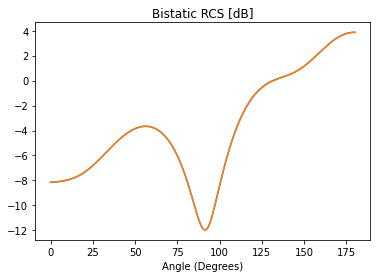

In [26]:
number_of_angles = 400
angles = np.pi * np.linspace(0, 1, number_of_angles)
unit_points = np.array([np.sin(angles), np.zeros(number_of_angles), np.cos(angles)])

electric_far1 = bempp.api.operators.far_field.maxwell.electric_field(exactCurr.space, unit_points, kappa)*exactCurr

electric_far2 = bempp.api.operators.far_field.maxwell.electric_field(sol.space, unit_points, kappa)*sol

magnetic_far = bempp.api.operators.far_field.maxwell.magnetic_field(electric_incident.space, unit_points, kappa)* electric_incident

far_field1 = electric_far1 + magnetic_far
far_field2 = electric_far2 + magnetic_far

bistatic_rcs= 10 * np.log10(np.sum(np.abs(far_field1)**2, axis=0))
plt.plot(angles * 180 / np.pi, bistatic_rcs)
plt.title("Bistatic RCS [dB]")
_ = plt.xlabel('Angle (Degrees)')

bistatic_rcs= 10 * np.log10(np.sum(np.abs(far_field2)**2, axis=0))
plt.plot(angles * 180 / np.pi, bistatic_rcs)
plt.title("Bistatic RCS [dB]")
_ = plt.xlabel('Angle (Degrees)')


Condition numbers:

In [27]:
print(np.linalg.cond(as_matrix(electric.weak_form())), np.linalg.cond(as_matrix(magnetic1.weak_form())), np.linalg.cond(as_matrix(magnetic2.weak_form())),np.linalg.cond(as_matrix(M.weak_form())))

14.960175667037214 144169.73728284953 144983.3504841331 19.31117658343759


## Approximate MtE operator

\begin{align*}
\pmb{\Lambda}_{1,\varepsilon} = (1+\mathcal{J})^{1/2} &\approx\left(R_{0}\vecv{I}-\sum_{j=1}^{N_{p}}\frac{A_{j}}{B_{j}} (\vecv{I}+B_{j}\mathcal{J})^{-1}\right)\\
\mathcal{J}  &= \sgrad \frac{1}{\kappa_{\varepsilon}^{2}}\sdiv - \vscurl \frac{1}{\kappa_{\varepsilon}^{2}}\scurl
\end{align*}

\begin{align*}
\pmb{\Lambda}_{1,\varepsilon} \varphi &\approx\left(R_{0}\varphi-\sum_{j=1}^{N_{p}}\frac{A_{j}}{B_{j}} \phi^{j} \right)\\
(\vecv{I}+B_{j}\mathcal{J})^{-1}\varphi &= \phi{j}\\
\mathcal{J}  &= \sgrad \frac{1}{\kappa_{\varepsilon}^{2}}\sdiv - \vscurl \frac{1}{\kappa_{\varepsilon}^{2}}\scurl
\end{align*}

So we need to approximate $\lambda_{j}^{-1} =(\vecv{I}+B_{j}(\sgrad \frac{1}{\kappa_{\varepsilon}^{2}}\sdiv - \vscurl \frac{1}{\kappa_{\varepsilon}^{2}}\scurl))^{-1}$. By performing an extended discretization of $\lambda_{j}$

\begin{equation*}
\lambda_{j}' =
\begin{cases} 
 \int_{\Gamma_{h}}\left(\pmb{\phi}_{h}^{j} \cdot \vecv{w}^{j}_{h} -\frac{B_{j}}{\kappa^{2}_{\varepsilon}}\curl_{\Gamma_{h}}\pmb{\phi}_{h}^{j}\curl_{\Gamma_{h}}\vecv{w}_{h}^{j}\right) d\Gamma_{h}+B_{j}\int_{\Gamma_{h}}\nabla_{\Gamma_{h}}\rho_{h}^{j}\cdot \vecv{w}_{h}^{j} d\Gamma_{h}  = 0 \\ 
 \int_{\Gamma_{h}} (\kappa^{2}_{\varepsilon}\rho_{h}^{j}z_{h}^{j} + \pmb{\phi}_{h}^{j}\cdot \nabla_{\Gamma_{h}}z_{h}^{j})d\Gamma_{h} = 0,\end{cases} 
\end{equation*}

\begin{equation*}
\lambda_{j}'\begin{bmatrix}
\phi_{h}^{j}\\
\rho_{h}^{j}\\
\end{bmatrix} =
\begin{bmatrix}
\mathbb{A}_{p,q}-B_{j}\mathbb{N}_{p,q}  & B_{j}\mathbb{L}_{m,q}\\
\mathbb{L}_{m,q}^{T}& \mathbb{K}_{m,q} \\
\end{bmatrix} \begin{bmatrix}
\phi_{h}^{j}\\
\rho_{h}^{j}\\
\end{bmatrix} 
 = \begin{bmatrix}
\varphi_{h}\\
0\\
\end{bmatrix} 
\end{equation*}


Then by calculating the inverse of $\lambda_{j}'$, we have:

\begin{equation*}
\begin{bmatrix}
\vecv{A}_{j} & \vecv{B}_{j}\\
\vecv{C}_{j} & \vecv{D}_{j} \\
\end{bmatrix} 
 \begin{bmatrix}
\varphi_{h}\\
0\\
\end{bmatrix} =
\begin{bmatrix}
\vecv{A}_{j}\varphi_{h}\\
\vecv{C}_{j}\varphi_{h}\\
\end{bmatrix}  =
\begin{bmatrix}
\phi_{h}^{j}\\
\rho_{h}^{j}\\
\end{bmatrix} 
\end{equation*}

So $\phi_{h}^{j} = \vecv{A}_{j}\varphi_{h} = \lambda_{j}^{-1}\varphi_{h}$. By performing block matrix inversion of $\lambda_{j}'$, we have: 

\begin{equation}
 \lambda_{j}^{-1} = (\mathbb{A}_{p,q}-B_{j}(\mathbb{N}_{p,q} +\mathbb{L}_{m,q}\mathbb{K}_{m,q} ^{-1}\mathbb{L}_{m,q}^{T}))^{-1}
\end{equation}

Then:
\begin{equation}
\pmb{\Lambda}_{1,\varepsilon} = R_{0} \mathbb{A}_{p,q} -\sum_{j=1}^{Np}\frac{A_{j}}{B_{j}}  \lambda_{j}^{-1}
\end{equation}

\begin{align*}
\SLO \tilde{\vecv{V}}^{-1}\varphi &= -\SLO \mathbb{B}_{p,q} \Lambda_{2,\varepsilon}^{-1} \Lambda_{1.\varepsilon}\varphi\\
&= -\SLO \mathbb{B}_{p,q} \Lambda_{2,\varepsilon}^{-1} \left(R_{0} \mathbb{A}_{p,q} -\sum_{j=1}^{Np}\frac{A_{j}}{B_{j}}  \lambda_{j}^{-1}\right)\varphi\\
&= -\SLO \mathbb{B}_{p,q} \Lambda_{2,\varepsilon}^{-1} R_{0} \mathbb{A}_{p,q}\varphi +\sum_{j=1}^{Np}\frac{A_{j}}{B_{j}}  \SLO \mathbb{B}_{p,q} \Lambda_{2,\varepsilon}^{-1} \phi_{j}\\
\lambda_{j}\phi_{j} &= \varphi \Rightarrow 0 = (\mathbb{A}_{p,q}-B_{j}(\mathbb{N}_{p,q} +\mathbb{L}_{m,q}\mathbb{K}_{m,q} ^{-1}\mathbb{L}_{m,q}^{T}))\phi_{j} - \varphi
\end{align*}

Again, we try to solve the following CFIE:

\begin{align}
\SLO \vecv{V}^{-1}\magnetic^{+}\vecv{u} + \left(\frac{\vecv{I}}{2}-\DLO \right)\magnetic^{+}\vecv{u} = \vecv{V}\tangential^{+}\vecv{u}^{inc}\\
\end{align}

But instead of having $\vecv{V} = \left(\frac{\vecv{I}}{2}+\DLO \right)^{-1} \SLO \magnetic^{+}$ we have the approximate operator $\tilde{\vecv{V}}$ which can be built in a system by:

\begin{align*}
(\vecv{I} - \DLO + \SLO \mathbb{B}_{p,q} \Lambda_{2,\varepsilon}^{-1} R_{0} \mathbb{A}_{p,q})\varphi -\sum_{j=1}^{Np}\frac{A_{j}}{B_{j}}  \SLO \mathbb{B}_{p,q} \Lambda_{2,\varepsilon}^{-1} \phi_{j} &= \vecv{V}\tangential^{+}e^{inc}\\
 (\mathbb{A}_{p,q}-B_{j}(\mathbb{N}_{p,q} +\mathbb{L}_{m,q}\mathbb{K}_{m,q} ^{-1}\mathbb{L}_{m,q}^{T}))\phi_{j} - \varphi &=0
\end{align*}

\begin{equation}
\begin{pmatrix}
    \vecv{I} - \DLO + \SLO \mathbb{B}_{p,q} \Lambda_{2,\varepsilon}^{-1} R_{0} \mathbb{A}_{p,q}      & -\frac{A_{1}}{B_{1}}  \SLO \mathbb{B}_{p,q} \Lambda_{2,\varepsilon}^{-1}  & -\frac{A_{2}}{B_{2}}  \SLO \mathbb{B}_{p,q} \Lambda_{2,\varepsilon}^{-1} \\
   -\mathbb{A}_{p,q}     & (\mathbb{A}_{p,q}-B_{1}(\mathbb{N}_{p,q} +\mathbb{L}_{m,q}\mathbb{K}_{m,q} ^{-1}\mathbb{L}_{m,q}^{T})) &  0\\ 
  -\mathbb{A}_{p,q}     & 0&  (\mathbb{A}_{p,q}-B_{2}(\mathbb{N}_{p,q} +\mathbb{L}_{m,q}\mathbb{K}_{m,q} ^{-1}\mathbb{L}_{m,q}^{T}))
\end{pmatrix} \begin{pmatrix}
\varphi\\
\phi_{1}\\
\phi_{2}
\end{pmatrix}
\end{equation}


In [28]:
from IPython.display import FileLink, FileLinks
FileLink('preconditioned cfie solutions.png')

/Users/ignacia/Documents/Notes/Algorithms/preconditioned cfie solutions.png

In [29]:
FileLink('preconditioned cfie solutions kappa_eps.png')

/Users/ignacia/Documents/Notes/Algorithms/preconditioned cfie solutions kappa_eps.png

In [30]:
FileLink('preconditioned cfie alternatives.png')

/Users/ignacia/Documents/Notes/Algorithms/preconditioned cfie alternatives.png

Preconditioner by system: 889.4850777766954
Compact preconditioner: 5.152882335636446
Exact Preconditioner: 6.226698728587036
CFIE: 28.80068175601342

## Probable causes of trouble

Comparing:

\begin{align}
\SLO \vecv{V}^{-1}\magnetic^{+}\vecv{u} + \left(\frac{\vecv{I}}{2}-\DLO \right)\magnetic^{+}\vecv{u} = \vecv{V}\tangential^{+}\vecv{u}^{inc}\\
\end{align}

against

\begin{align}
\SLO \tilde{\vecv{V}}^{-1}\magnetic^{+}\vecv{u} + \left(\frac{\vecv{I}}{2}-\DLO \right)\magnetic^{+}\vecv{u} = \tilde{\vecv{V}}\tangential^{+}\vecv{u}^{inc}\\
\end{align}

We have a main issue. In the first case, both $\SLO$ $\left(\frac{\vecv{I}}{2}-\DLO \right)$ uses as trial space rwg basis functions, but in the second case this is a little bit more complex, as both the domain of $\tilde{\vecv{V}}^{-1}$ is defined over the curl space and the range can be defined in the rwg space which could be leading to different results.

## Idea

Change mapping properties of $\vecv{V}$ by modifying $\pmb{\Lambda}_{1,\varepsilon}$. In

\begin{equation}
\mathcal{J}  = \sgrad \frac{1}{\kappa_{\varepsilon}^{2}}\sdiv - \vscurl \frac{1}{\kappa_{\varepsilon}^{2}}\scurl
\end{equation}

we can use the identity:

\begin{equation}
\scurl(\vecv{u}) = \sdiv(\vecv{u}\times \nu)
\end{equation}

Then the weak formulation

\begin{align}
\int \mathcal{J}(\vecv{u}) \cdot \vecv{v} &=\int\frac{1}{\kappa_{\varepsilon}^{2}} \sgrad(f) \cdot \vecv{v}- \frac{1}{\kappa_{\varepsilon}^{2}}\int \scurl( \vecv{u}) \cdot \scurl(\vecv{v})\\
\int\sdiv(\vecv{u}) p&= -\int\vecv{u} \cdot \sgrad(p)
\end{align}

becomes:

\begin{align}
\int \mathcal{J}(\vecv{u}) \cdot \vecv{v} &=\int\frac{1}{\kappa_{\varepsilon}^{2}} \sgrad(f) \cdot \vecv{v}- \frac{1}{\kappa_{\varepsilon}^{2}}\int \sdiv( \vecv{u} \times \nu) \cdot \scurl(\vecv{v})\\
\int\sdiv(\vecv{u}) p&= -\int\vecv{u} \cdot \sgrad(p)
\end{align}

Replacing $\vecv{u} \times \nu$ by $\vecv{h}$, we have that $\nu \times \vecv{h} = \vecv{u}$. Hence, we have the following system:

\begin{align}
\int \mathcal{J}(\nu \times \vecv{h}) \cdot \vecv{v} &=\int\frac{1}{\kappa_{\varepsilon}^{2}} \sgrad(f) \cdot \vecv{v}- \frac{1}{\kappa_{\varepsilon}^{2}}\int \sdiv(\vecv{h}) \cdot \scurl\vecv{v}\\
\int\sdiv(\nu \times \vecv{h}) p&= -\int\nu \times \vecv{h}\cdot \sgrad(p) =  \int\vecv{h} \times \nu\cdot \sgrad(p)
\end{align}

If we prescribe that $\vecv{v}$ lies in a curl conforming space and $\vecv{u}$ in a div conforming space, then we can obtain an operator that maps from a div conforming space to a curl conforming space, then we compose this with $\pmb{\Lambda}_{2,\varepsilon}$ that maps from a curl conforming space to a curl conforming space and finally we apply the twisted inner product that maps from a curl conforming space to a div conforming space and we get the operator that we needed. 

